In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from transitfit import LightCurve, KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
lc.save_hdf('test_lc.h5')
lc = LightCurve.load_hdf('test_lc.h5')

In [3]:
model = TransitModel(lc)

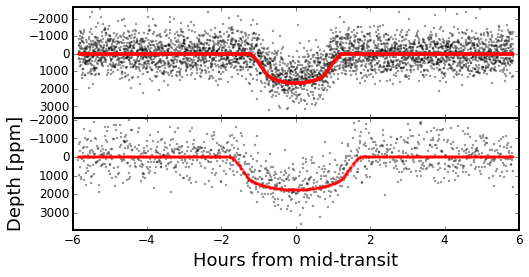

In [4]:
params = lc.default_params  #super-simple guesses for parameters
fig = model.plot_planets(params); #not bad!

In [5]:
model.lnpost(params)

-0.00089322093492889463

In [6]:
%timeit f = model(params) #evaluates ln(posterior)

10 loops, best of 3: 73.3 ms per loop


In [7]:
#fit = model.fit_leastsq(params, options={'disp':True})
#fig = model.plot_planets(lc.default_params, color='b'); 
#fig = model.plot_planets(model._bestfit, color='r', fig=fig);

In [7]:
import time
start = time.time()
model.fit_emcee(nburn=10, niter=50); 
stop = time.time()
print 'emcee fit took {:.1f} minutes.'.format((stop-start)/60)

emcee fit took 3.5 minutes.


In [9]:
model.save_hdf('test_model.h5')

In [10]:
model = TransitModel.load_hdf('test_model.h5')

In [8]:
model.samples.head()

,dilution,flux_zp,q1,q2,rho,period_1,epoch_1,b_1,rprs_1,ecc_1,omega_1,period_2,epoch_2,b_2,rprs_2,ecc_2,omega_2
0,0.011877,1.001953,0.464332,0.499389,4.004185,5.820299,135.924098,0.536309,0.023817,0.000406,0.007518,19.879871,133.587391,0.509428,0.039167,0.024775,0.005612
1,0.011877,1.001953,0.464332,0.499389,4.004185,5.820299,135.924098,0.536309,0.023817,0.000406,0.007518,19.879871,133.587391,0.509428,0.039167,0.024775,0.005612
2,0.011877,1.001953,0.464332,0.499389,4.004185,5.820299,135.924098,0.536309,0.023817,0.000406,0.007518,19.879871,133.587391,0.509428,0.039167,0.024775,0.005612
3,0.011877,1.001953,0.464332,0.499389,4.004185,5.820299,135.924098,0.536309,0.023817,0.000406,0.007518,19.879871,133.587391,0.509428,0.039167,0.024775,0.005612
4,0.011877,1.001953,0.464332,0.499389,4.004185,5.820299,135.924098,0.536309,0.023817,0.000406,0.007518,19.879871,133.587391,0.509428,0.039167,0.024775,0.005612


In [9]:
model.samples.std()

dilution    0.053200
flux_zp     0.036028
q1          0.088855
q2          0.074677
rho         0.101914
period_1    0.090127
epoch_1     0.110329
b_1         0.095233
rprs_1      0.066762
ecc_1       0.037056
omega_1     0.049316
period_2    0.104621
epoch_2     0.076284
b_2         0.081004
rprs_2      0.062485
ecc_2       0.031510
omega_2     0.052766
dtype: float64

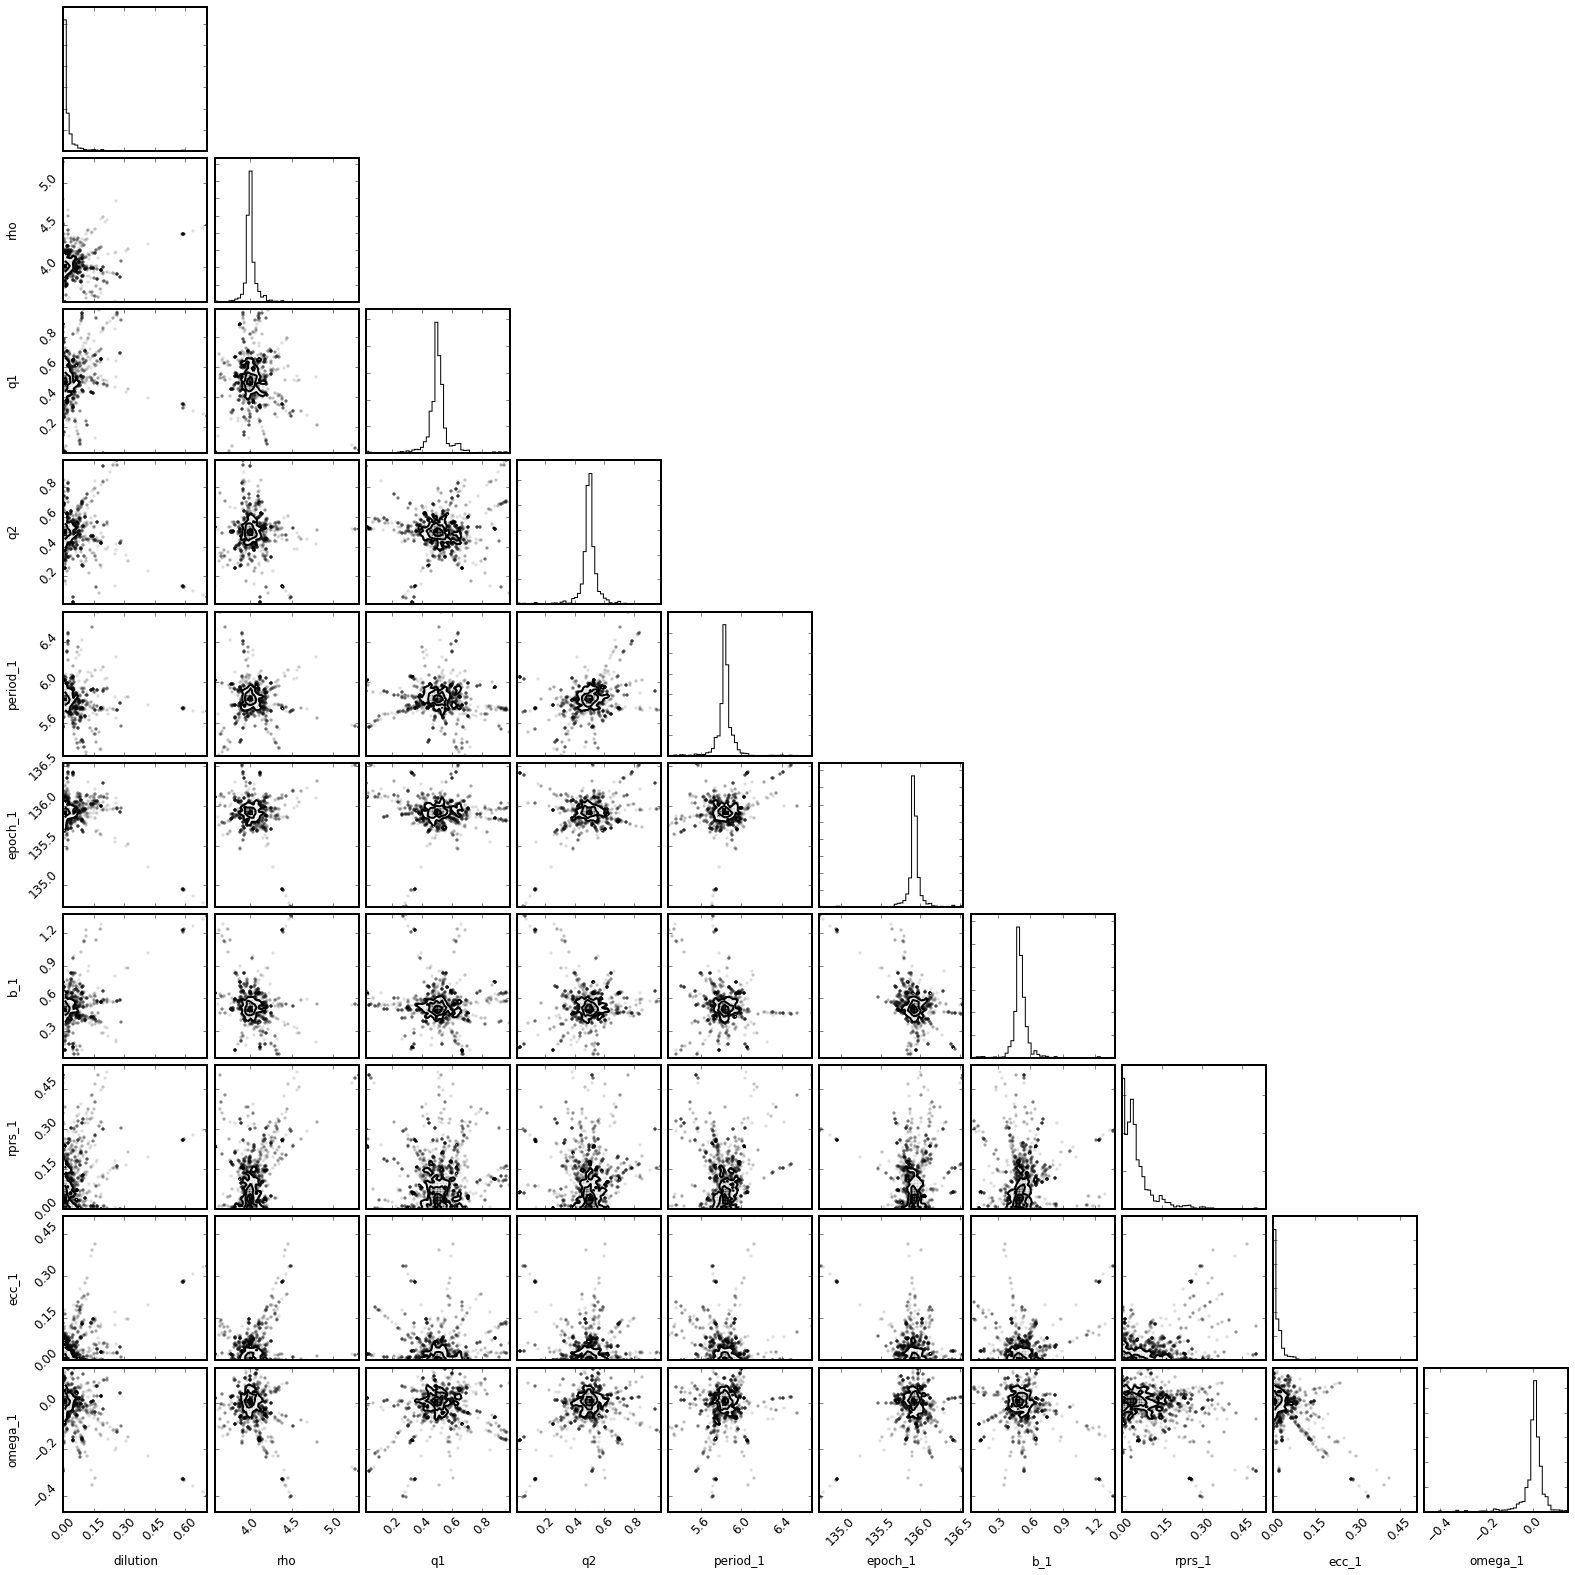

In [11]:
model.triangle(i=0);